# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

573

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# set up lists to hold reponse info
temp = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cityies = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        cityies.append(city)
        print(f"we have found {city}")
    except:
        print("Oopsie")

we have found hithadhoo
we have found exaplatanos
we have found busselton
Oopsie
we have found fortuna
we have found saint george
we have found bluff
we have found cantaura
we have found surt
we have found nkowakowa
we have found methoni
Oopsie
we have found cidreira
we have found richards bay
we have found hilo
we have found torrijos
we have found rundu
we have found victoria
we have found avarua
we have found rikitea
we have found tuktoyaktuk
we have found punta arenas
Oopsie
we have found brechin
Oopsie
we have found price
we have found groa
we have found bilibino
we have found ushuaia
we have found naze
we have found hobart
we have found kapaa
Oopsie
we have found faanui
we have found butaritari
we have found naryan-mar
we have found nizwa
we have found qaanaaq
we have found grand gaube
Oopsie
we have found esperance
we have found nikolskoye
we have found port alfred
we have found mataura
we have found mayskiy
we have found veraval
we have found hobyo
we have found barrow
we have f

we have found yumen
we have found chapleau
we have found ulagan
we have found barroquinha
we have found oranjestad
we have found komsomolskiy
we have found nenjiang
we have found anadyr
we have found khakhea
we have found khuzhir
we have found gavle
we have found athabasca
we have found altamira
Oopsie
we have found dakar
Oopsie
we have found rawson
we have found namtsy
we have found ongandjera
we have found flin flon
we have found tondi
we have found yuzhou
we have found norman wells
we have found cayenne
we have found grindavik
we have found qostanay
we have found kirovsk
we have found alofi
we have found san policarpo
we have found christchurch
we have found bairiki
Oopsie
we have found sulangan
we have found kijang
we have found aklavik
we have found fairbanks
we have found naifaru
we have found ondjiva
we have found mouila
Oopsie
we have found haapiti
we have found kisangani
we have found guozhen
we have found mayaky
we have found san pedro masahuat
we have found brae
we have foun

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df = pd.DataFrame({"City":cityies, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date})
weather_df.to_csv('Weather.csv')

In [20]:
weather_df.head()
len(weather_df)

521

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
weather_df.drop(weather_df.loc[weather_df['Humidity']>100].index, inplace=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,29.06,73,62,3.48,MV,1593305202
1,exaplatanos,40.98,22.12,23.33,60,0,1.34,GR,1593305718
2,busselton,-33.65,115.33,15.56,74,97,7.62,AU,1593305036
3,fortuna,40.60,-124.16,16.67,72,75,6.70,US,1593305217
4,saint george,37.10,-113.58,39.00,8,1,4.60,US,1593305035


In [22]:
#  Get the indices of cities that have humidity over 100%.


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [24]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Maximum Temperature')

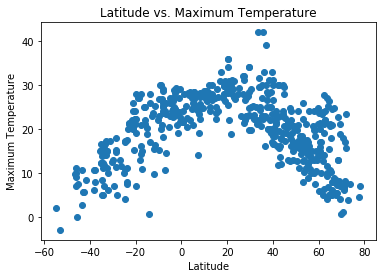

In [25]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Maximum Temperature")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

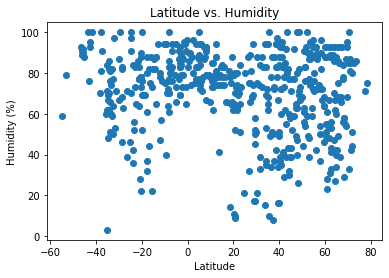

In [26]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

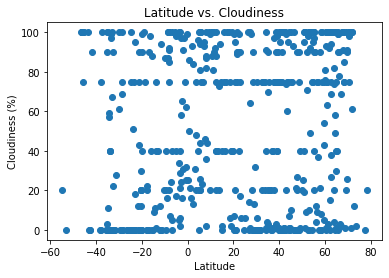

In [27]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

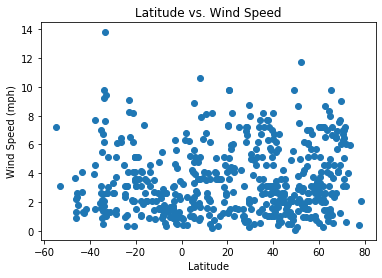

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots

In [30]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression